In [7]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import os
os.chdir("drive/My Drive/Academics/Machine Learning /Project")
!ls

 aapl_loss.PNG		      'Final Report.gdoc'
 aapl_loss.txt		       googl_loss.PNG
 aapl.us.csv		       googl_loss.txt
 amzn_loss.PNG		       LinearRegressionModel.ipynb
 amzn_loss.txt		       msft_loss.PNG
 ConvolutionalAlgo.ipynb       msft_loss.txt
 Covolution2.ipynb	       Tasks.gdoc
 Datasets		      'Zoom 2020-05-06 09-06-46.mp4'
'Final Presentation.gslides'


In [0]:
import numpy as np
import pandas as pd
import scipy.signal # Has useful routines for 2D convolutions.
import skimage.data # Sub-package for getting some basic images.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D
import tensorflow.keras.backend as K

In [0]:
# Checks GPU connection
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10659413489556545996
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14973710691437677865
physical_device_desc: "device: XLA_CPU device"
]


In [0]:
# def cnn_model_fn(features, labels, mode):  
#   """Model function for CNN."""  

#   # Input Layer  
#   input_layer = tf.reshape(tf.cast(features["x"], tf.float32), [-1, 154, 100, 2])

#   # Convolutional Layer #1
#   conv1 = tf.layers.conv2d(
#       inputs=input_layer,
#       filters=32,
#       kernel_size=[1, 5],
#       padding="same",
#       activation=tf.nn.relu)

#   # Pooling Layer #1
#   pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[1, 2], strides=[1,2])

#   # Convolutional Layer #2
#   conv2 = tf.layers.conv2d(
#       inputs=pool1,
#       filters=8,
#       kernel_size=[1, 5],
#       padding="same",
#       activation=tf.nn.relu)

#   # Pooling Layer #2
#   pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[1, 5], strides=[1,5])

#   # Convolutional Layer #3
#   conv3 = tf.layers.conv2d(
#           inputs=pool2,
#           filters=2,
#           kernel_size=[154, 5],
#           padding="same",
#           activation=tf.nn.relu)
  
#   # Pooling Layer #3
#   pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[1, 2], strides=[1, 2])

#   # Dense Layer
#   pool3_flat = tf.reshape(pool3, [-1, 154 * 5 * 2])
#   dense = tf.layers.dense(inputs=pool3_flat, units=512, activation=tf.nn.relu)
#   dropout = tf.layers.dropout(
#       inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

#   # Logits Layer
#   logits = tf.layers.dense(inputs=dropout, units=154)
#   predictions = {
#       # Generate predictions (for PREDICT and EVAL mode)
#       "classes": tf.argmax(input=logits, axis=1),
#       "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
#   }

#   if mode == tf.estimator.ModeKeys.PREDICT:
#     return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

#   # Calculate Loss (for both TRAIN and EVAL modes)
#   multiclass_labels = tf.reshape(tf.cast(labels, tf.int32), [-1, 154])
#   loss = tf.losses.sigmoid_cross_entropy(
#       multi_class_labels=multiclass_labels, logits=logits)

#   # Configure the Training Op (for TRAIN mode)
#   if mode == tf.estimator.ModeKeys.TRAIN:
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
#     train_op = optimizer.minimize(
#         loss=loss,
#         global_step=tf.train.get_global_step())
#     return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

In [0]:
def create_dly_data(X,y,dly, days):
    """
    Create delayed data
    """
    Xdly = []
    # X tranformation
    for i in range(dly-days,X.shape[0]-days):
      row = np.array([])
      j = 0
      while j != dly:
        row = np.hstack([X.iloc[i-j,:],row])
        j+=1
      Xdly.append(row)
    Xdly = np.array(Xdly)

    # Y transformation
    ydly = []
    for i in range(dly,y.shape[0]):
      ydly.append(y[i])
    ydly = np.array(ydly)

    return Xdly, ydly

In [9]:
X = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:, "Close"]
print("Microsoft stocks:")
Xdly, ydly = create_dly_data(X, y, 7, 1)
Xtr, Xts, ytr, yts = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)

Microsoft stocks:


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K

In [0]:
K.clear_session()

In [0]:
def create_mod(delay, use_dropout=False, use_bn=False):
  model = Sequential()
  model.add(Conv1D(128, 2, padding='valid', activation='relu',
                     input_shape=(delay*4,1)))
  model.add(MaxPooling1D(pool_size=2))
  if use_bn:
    model.add(BatchNormalization())
  model.add(Conv1D(64, 2, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  if use_bn:
      model.add(BatchNormalization())
  if use_dropout:
      model.add(Dropout(0.5))
  # model.add(Dense(50, activation = 'relu'))
  # if use_bn:
  #     model.add(BatchNormalization())
  # if use_dropout:
  #     model.add(Dropout(0.5))
  model.add(Dense(1, activation="linear"))
  
  return model

In [0]:
def create_mod_two():
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(2, 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  return model

In [0]:
# Parameters
nepochs = 50
batch_size = 32
lr = 1e-3
decay = 1e-4

In [221]:
# basic model
one_day = []
seven_day = []
fourteen_day = []
# twenty_one_day = []
# twenty_eight_day = []
intervals = [1,7,14]
for interval in intervals:
  for i in range(1,30):
    Xdly, ydly = create_dly_data(X, y, i, interval)
    Xtr, Xts, ytr, yts = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
    K.clear_session()

    model1 = create_mod(i)
    # model2 = create_mod(delay=i, interval=7)
    # model3 = create_mod(delay=i, interval=14)

    # Create the optimizer
    opt = optimizers.RMSprop(lr=lr, decay=decay)

    # Compile
    hist1 = model1.compile(loss='mae', optimizer=opt)
    # hist2 = mode2.compile(loss='mae', optimizer=opt)
    # hist3 = mode3.compile(loss='mae', optimizer=opt)
    print(model1.summary())
    # print(model2.summary())
    # print(model3.summary())

    # Fit the model
    X_reshaped1 = Xtr.reshape((Xtr.shape[0], Xtr.shape[1], 1))
    X_reshaped2 = Xts.reshape((Xts.shape[0], Xts.shape[1], 1))
    hist = model1.fit(X_reshaped1, ytr, epochs=nepochs)
    yhat1 = model1.predict(X_reshaped2)
    loss = np.mean(np.abs(yhat1 - yts))

    train_loss = hist.history["loss"].pop()
    if interval == 1:
      one_day.append((train_loss, loss, yhat, yts))
    if interval == 7:
      seven_day.append((train_loss, loss, yhat, yts))
    if interval == 14:
      fourteen_day.append((train_loss, loss, yhat, yts))

  # Save history
  mod_name = 'basic'
  # hist_fn = ('hist_%s.p' % mod_name)
  # # with open(hist_fn, 'wb') as fp:
  # #     hist_dict = hist.history
  # #     pickle.dump(hist_dict, fp) 
  # print('History saved as %s' % hist_fn)

Streaming output truncated to the last 5000 lines.
175/175 [==============================] - 0s 2ms/step - loss: 10.6089
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 34, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 17, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 544)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                27250     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 27,429
Trainable params: 27,429
Non-trainable params: 0
______________________________________________________________

KeyboardInterrupt: ignored

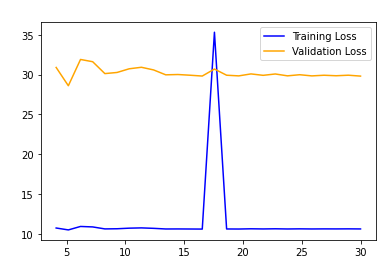

In [259]:
x_vals = np.linspace(1,30,29)
y_vals = [val[1] for val in one_day]
y_train = [val[0] for val in one_day]
plt.plot(x_vals[3:], y_train[3:], c="blue");
plt.plot(x_vals[3:], y_vals[3:], c="orange");
plt.xlabel("Interval", c="white")
plt.ylabel("Loss", c="white")
# plt.xticks(c="white")
# plt.yticks(c="white")
plt.title("Microsoft best loss", c="white");
plt.legend(["Training Loss", "Validation Loss"]);

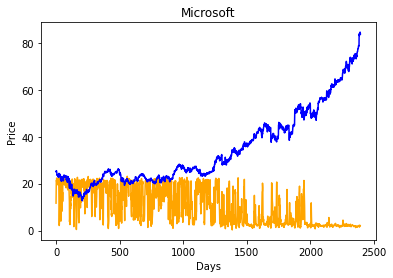

In [242]:
min_val=min(seven_day, key= lambda x: x[1])
x_vals = np.linspace(0,len(min_val[2])-1, len(min_val[2]))
x_vals2 = np.linspace(0,len(min_val[3])-1, len(min_val[3]))
plt.plot(x_vals, min_val[2], c="orange")
plt.plot(x_vals2, min_val[3], c="blue")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Microsoft");
# plt.xticks()
# plt.yticks()

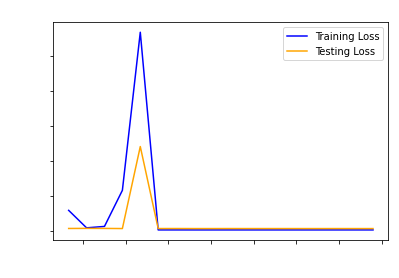

In [253]:
x_vals = np.linspace(1,22,21)
y_vals = [val[1] for val in seven_day]
y_train = [val[0] for val in seven_day]
plt.plot(x_vals[3:], y_train[3:], c="blue");
plt.plot(x_vals[3:], y_vals[3:], c="orange");
plt.xlabel("Interval", c="white")
plt.ylabel("Loss", c="white")
plt.xticks(c="white")
plt.yticks(c="white")
plt.legend(["Training Loss", "Testing Loss"])
plt.title("Microsoft best loss", c="white");

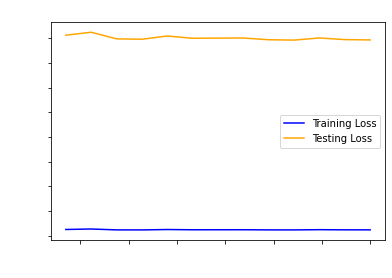

In [260]:
x_vals = np.linspace(1,22,21)
y_vals = [val[1] for val in seven_day]
y_train = [val[0] for val in seven_day]
plt.plot(x_vals[8:], y_train[8:], c="blue");
plt.plot(x_vals[8:], y_vals[8:], c="orange");
plt.xlabel("Interval", c="white")
plt.ylabel("Loss", c="white")
plt.xticks(c="white")
plt.yticks(c="white")
plt.legend(["Training Loss", "Testing Loss"])
plt.title("Microsoft best loss", c="white");

In [15]:
Xdly, ydly = create_dly_data(X, y, 7, 1)
Xtr, Xts, ytr, yts = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
K.clear_session()

model1 = create_mod(7)
# model2 = create_mod(delay=i, interval=7)
# model3 = create_mod(delay=i, interval=14)

# Create the optimizer
opt = optimizers.RMSprop(lr=lr, decay=decay)

# Compile
hist1 = model1.compile(loss='mae', optimizer=opt)
# hist2 = mode2.compile(loss='mae', optimizer=opt)
# hist3 = mode3.compile(loss='mae', optimizer=opt)
print(model1.summary())
# print(model2.summary())
# print(model3.summary())

# Fit the model
X_reshaped1 = Xtr.reshape((Xtr.shape[0], Xtr.shape[1], 1))
X_reshaped2 = Xts.reshape((Xts.shape[0], Xts.shape[1], 1))
hist = model1.fit(X_reshaped1, ytr, epochs=nepochs)
yhat1 = model1.predict(X_reshaped2)
loss = np.mean(np.abs(yhat1 - yts))

train_loss = hist.history["loss"].pop()
# if interval == 1:
#   one_day.append((train_loss, loss, yhat, yts))
# if interval == 7:
#   seven_day.append((train_loss, loss, yhat, yts))
# if interval == 14:
#   fourteen_day.append((train_loss, loss, yhat, yts))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 27, 128)           384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 64)            16448     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 385       
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
____________________________________________________

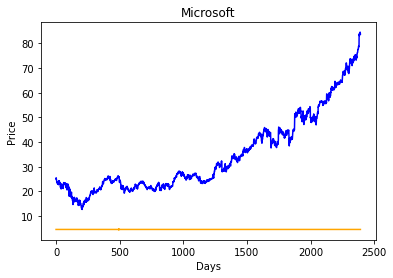

In [17]:
x_vals = np.linspace(0,len(yhat1)-1, len(yhat1))
x_vals2 = np.linspace(0,len(yts)-1, len(yts))
plt.plot(x_vals, yhat1, c="orange")
plt.plot(x_vals2, yts, c="blue")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Microsoft");
# plt.xticks()
# plt.yticks()